# Computer Vision - Convolutional Neural Network

In [8]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [9]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
import zipfile

# Unzip the data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [10]:
# Check the structure
!dir /b pizza_steak

test
train


In [11]:
# Walk through the dir structure
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak\test.
There are 0 directories and 250 files in pizza_steak\test\pizza.
There are 0 directories and 250 files in pizza_steak\test\steak.
There are 2 directories and 0 files in pizza_steak\train.
There are 0 directories and 750 files in pizza_steak\train\pizza.
There are 0 directories and 750 files in pizza_steak\train\steak.


In [12]:
# Another way to find out how many images are in the target directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

In [16]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [17]:
# Function to visialise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img


Image shape: (512, 512, 3)


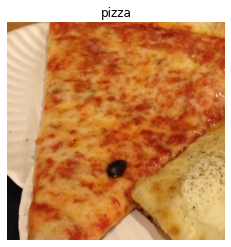

In [22]:
# Viewing random image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")